<a href="https://colab.research.google.com/github/dewoller/uofl_seminars/blob/main/uofl_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [ ]:

# Convert to binary classification (Class 0 vs Class 1)
X = X[y != 2]  # Remove Class 2
y = y[y != 2]  # Remove Class 2


In [ ]:

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


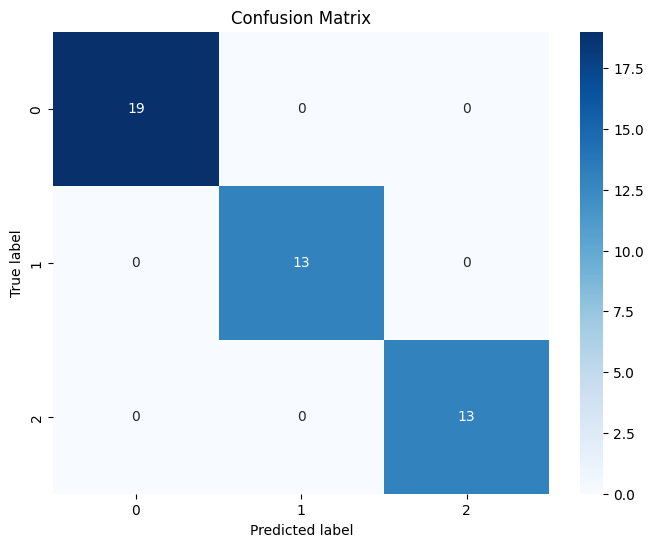

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


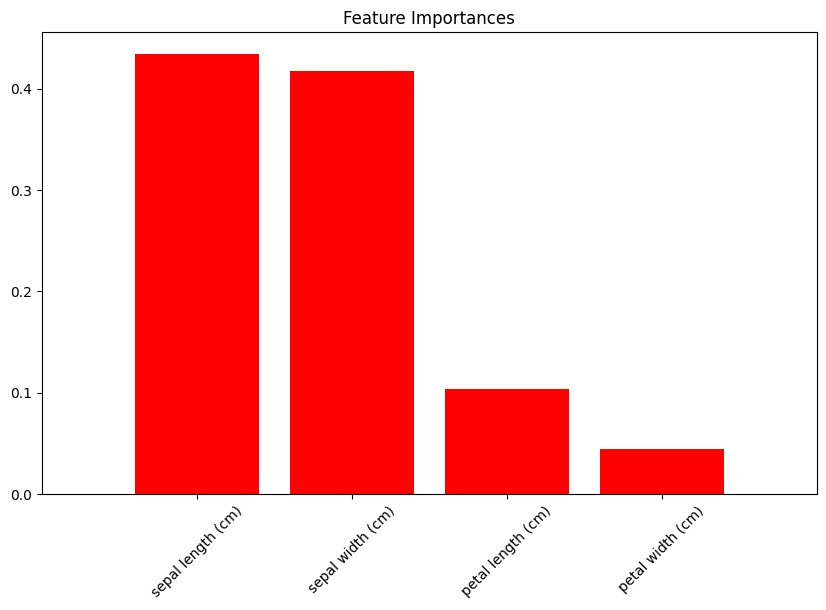

In [ ]:

# Feature Importance
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()